In [47]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [4]:
df.shape

(26729, 10)

In [9]:
nulls=df.isnull().sum().sum()
nulls

21322

In [8]:
total_cells = df.shape[1]*df.shape[0]
total_cells

267290

In [11]:
nulls_percent = (nulls * 100) / total_cells
nulls_percent


7.9771035205207825

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB


In [14]:
df.duplicated().sum()

0

In [18]:
len(df.DateTime.unique())

22918

In [24]:
(df['OutcomeType'].value_counts())/len(df['OutcomeType'])

Adoption           0.402896
Transfer           0.352501
Return_to_owner    0.179056
Euthanasia         0.058177
Died               0.007370
Name: OutcomeType, dtype: float64

In [25]:
cats=df.loc[df['AnimalType']=='Cat']

In [27]:
cats['OutcomeType'].value_counts()/len(cats['OutcomeType'])

Transfer           0.494431
Adoption           0.383690
Euthanasia         0.063769
Return_to_owner    0.044907
Died               0.013203
Name: OutcomeType, dtype: float64

In [28]:
dogs=df.loc[df['AnimalType']=='Dog']

In [29]:
dogs['OutcomeType'].value_counts()/len(dogs['OutcomeType'])

Adoption           0.416608
Return_to_owner    0.274832
Transfer           0.251170
Euthanasia         0.054184
Died               0.003206
Name: OutcomeType, dtype: float64

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline


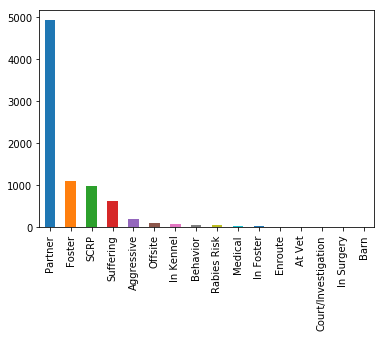

In [102]:
df['OutcomeSubtype'].value_counts().plot.bar()

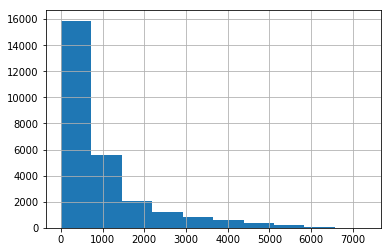

In [58]:
def d2(string):
   res = 0
   if type(string)==str:
       t = string.split()
       mul = t[0]
       it = t[1]
       period = 0
       if 'year' in it:
           period = 365
       if 'month' in it:
           period = 30
       if 'week' in it:
           period = 7
       if 'day' in it:
           period = 1
       res = int(mul)*period
   return res
df['days']=df['AgeuponOutcome'].apply(d2)
df.head()
df['days'].hist()



In [53]:
sexnonull = df.loc[df['SexuponOutcome'].notnull()]

males = sexnonull[sexnonull['SexuponOutcome'].str.contains(' Male')]    
females = sexnonull[sexnonull['SexuponOutcome'].str.contains(' Female')] 

In [54]:
males['OutcomeType'].value_counts()/len(males['OutcomeType'])

Adoption           0.404390
Transfer           0.321783
Return_to_owner    0.204750
Euthanasia         0.061711
Died               0.007366
Name: OutcomeType, dtype: float64

In [55]:
females['OutcomeType'].value_counts()/len(females['OutcomeType'])

Adoption           0.437029
Transfer           0.339470
Return_to_owner    0.166167
Euthanasia         0.051334
Died               0.006001
Name: OutcomeType, dtype: float64

In [60]:
adopted = df.loc[df['OutcomeType']=='Adoption']

In [61]:
adopted.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,days
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,150
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White,365
11,A666320,NaN,2013-11-04 14:48:00,Adoption,NaN,Dog,Spayed Female,2 years,Miniature Schnauzer Mix,Silver,730
12,A684601,Rocket,2016-02-03 11:27:00,Adoption,Foster,Dog,Neutered Male,4 years,Pit Bull Mix,Brown,1460


In [64]:
adopted['DateTime'] = pd.to_datetime(adopted['DateTime'])

C:\Users\marcm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
adopted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10769 entries, 2 to 26726
Data columns (total 11 columns):
AnimalID          10769 non-null object
Name              9091 non-null object
DateTime          10769 non-null datetime64[ns]
OutcomeType       10769 non-null object
OutcomeSubtype    1966 non-null object
AnimalType        10769 non-null object
SexuponOutcome    10769 non-null object
AgeuponOutcome    10769 non-null object
Breed             10769 non-null object
Color             10769 non-null object
days              10769 non-null int64
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1009.6+ KB


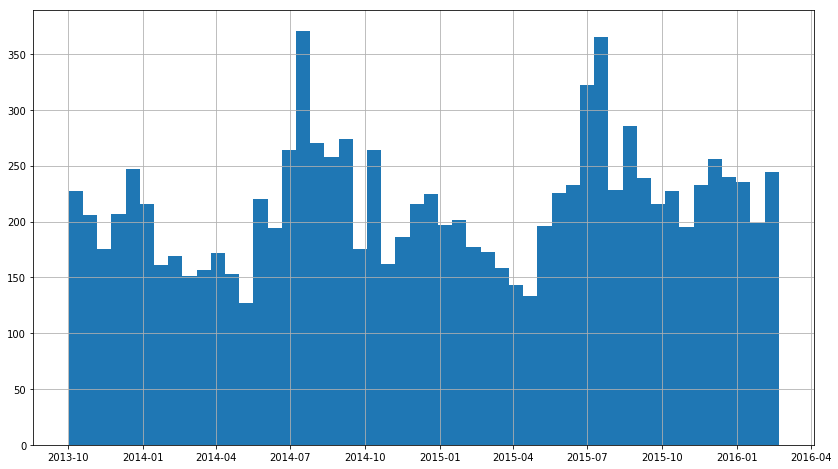

In [71]:
adopted['DateTime'].hist(bins=50, figsize=(14,8))

In [72]:
df_sample = df.sample(10000)

In [73]:
df = df.drop(df_sample.index)

In [74]:
df_sample.shape

(10000, 11)

In [75]:
df.shape

(16729, 11)

In [80]:
from scipy.stats import ttest_ind

ttest_ind(df['days'], df_sample['days'])


Ttest_indResult(statistic=-0.34007117383028646, pvalue=0.7338056018576609)

In [82]:
print(df['days'].mean())
print(df_sample['days'].mean())

791.8548030366429
796.5088


In [85]:
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,days
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,30


In [89]:
sexnonull['SexuponOutcome'].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [90]:

intact = sexnonull[sexnonull['SexuponOutcome'].str.contains('Intact')]    
neutered_spayed = sexnonull[(sexnonull['SexuponOutcome'].str.contains('Neutered'))|(sexnonull['SexuponOutcome'].str.contains('Spayed'))] 

In [91]:
len(intact)

7036

In [92]:
len(neutered_spayed)

18599

In [98]:
sexnonull['Neutered']= sexnonull['SexuponOutcome'].str.contains('Intact')== False 

In [99]:
sexnonull['Neutered'].head()

0     True
1     True
2     True
3    False
4     True
Name: Neutered, dtype: bool

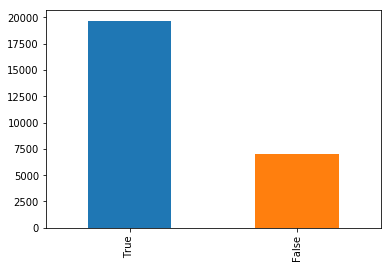

In [100]:
sexnonull['Neutered'].value_counts().plot.bar()